<a href="https://colab.research.google.com/github/mishrapiyush1309-sys/BARCODE-GENERATOR-MODEL/blob/main/barcode_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install qrcode[pil] python-barcode opencv-python


BARCODE & QR CODE GENERATOR

Generate Options:
1. Generate QR Code
2. Generate EAN-13 Barcode
3. Generate Code 128 Barcode
4. Generate Code 39 Barcode
5. Generate UPC-A Barcode
6. Exit

Enter your choice (1-6): 1

--- QR Code Generator ---
Enter text or URL to encode: https://github.com/mishrapiyush1309-sys/BARCODE-GENERATOR-MODEL.git
Enter filename (press Enter for auto): JJJ
🔄 Generating QR code...

BARCODE/QR CODE GENERATION RESULTS
✓ Type:        QR Code
✓ Data:        https://github.com/mishrapiyush1309-sys/BARCODE-GENERATOR-MODEL.git
✓ Saved to:    generated/JJJ
✓ File size:   0.81 KB
✓ Timestamp:   2025-11-25T18:51:28.584985

View image? (y/n): y


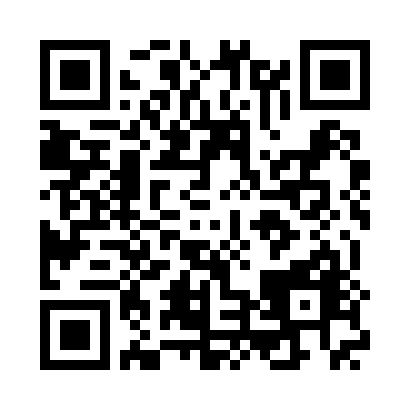

Generate Options:
1. Generate QR Code
2. Generate EAN-13 Barcode
3. Generate Code 128 Barcode
4. Generate Code 39 Barcode
5. Generate UPC-A Barcode
6. Exit


In [ ]:
import qrcode
import barcode
from barcode.writer import ImageWriter
import os
from pathlib import Path
from datetime import datetime
import cv2
import numpy as np

class BarcodeQRGenerator:
    """
    Python-based barcode and QR code generator.
    Generates and saves barcodes and QR codes.
    """

    def __init__(self, output_folder: str = "generated"):
        self.output_folder = output_folder

        # Create output folder if it doesn't exist
        Path(self.output_folder).mkdir(exist_ok=True)

    def generate_qr_code(self, data: str, filename: str = None, size: int = 10,
                        fill_color: str = "black", back_color: str = "white") -> str:
        """
        Generate a QR code from text data.

        Args:
            data: Text or URL to encode
            filename: Output filename (auto-generated if None)
            size: Size of QR code box in pixels
            fill_color: Foreground color
            back_color: Background color

        Returns:
            Path to generated QR code image
        """
        if not filename:
            filename = f"qrcode_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"

        filepath = os.path.join(self.output_folder, filename)

        try:
            # Create QR code
            qr = qrcode.QRCode(
                version=1,
                error_correction=qrcode.constants.ERROR_CORRECT_L,
                box_size=size,
                border=4,
            )
            qr.add_data(data)
            qr.make(fit=True)

            # Create image
            img = qr.make_image(fill_color=fill_color, back_color=back_color)

            # Save image
            img.save(filepath)

            return filepath

        except Exception as e:
            print(f"❌ Error generating QR code: {e}")
            return ""

    def generate_ean13(self, data: str, filename: str = None) -> str:
        """
        Generate an EAN-13 barcode.

        Args:
            data: 12-digit number (13th digit is checksum)
            filename: Output filename (auto-generated if None)

        Returns:
            Path to generated barcode image
        """
        # Remove non-digit characters
        data = ''.join(filter(str.isdigit, data))

        # EAN-13 requires exactly 13 digits (or 12 + checksum)
        if len(data) < 12:
            print(f"❌ EAN-13 requires at least 12 digits. You provided: {len(data)}")
            return ""
        elif len(data) > 13:
            data = data[:13]

        if not filename:
            filename = f"ean13_{data}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        filepath = os.path.join(self.output_folder, filename)

        try:
            # Create EAN-13 barcode
            ean = barcode.get('ean13', data, writer=ImageWriter())
            ean.save(filepath)

            return filepath + '.png'

        except Exception as e:
            print(f"❌ Error generating EAN-13 barcode: {e}")
            return ""

    def generate_code128(self, data: str, filename: str = None) -> str:
        """
        Generate a Code 128 barcode.

        Args:
            data: Text to encode
            filename: Output filename (auto-generated if None)

        Returns:
            Path to generated barcode image
        """
        if not filename:
            filename = f"code128_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        filepath = os.path.join(self.output_folder, filename)

        try:
            # Create Code 128 barcode
            code128 = barcode.get('code128', data, writer=ImageWriter())
            code128.save(filepath)

            return filepath + '.png'

        except Exception as e:
            print(f"❌ Error generating Code 128 barcode: {e}")
            return ""

    def generate_code39(self, data: str, filename: str = None) -> str:
        """
        Generate a Code 39 barcode.

        Args:
            data: Text to encode
            filename: Output filename (auto-generated if None)

        Returns:
            Path to generated barcode image
        """
        if not filename:
            filename = f"code39_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        filepath = os.path.join(self.output_folder, filename)

        try:
            # Create Code 39 barcode
            code39 = barcode.get('code39', data, writer=ImageWriter())
            code39.save(filepath)

            return filepath + '.png'

        except Exception as e:
            print(f"❌ Error generating Code 39 barcode: {e}")
            return ""

    def generate_upca(self, data: str, filename: str = None) -> str:
        """
        Generate a UPC-A barcode.

        Args:
            data: 11-digit number (12th digit is checksum)
            filename: Output filename (auto-generated if None)

        Returns:
            Path to generated barcode image
        """
        # Remove non-digit characters
        data = ''.join(filter(str.isdigit, data))

        # UPC-A requires exactly 12 digits (or 11 + checksum)
        if len(data) < 11:
            print(f"❌ UPC-A requires at least 11 digits. You provided: {len(data)}")
            return ""
        elif len(data) > 12:
            data = data[:12]

        if not filename:
            filename = f"upca_{data}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        filepath = os.path.join(self.output_folder, filename)

        try:
            # Create UPC-A barcode
            upca = barcode.get('upca', data, writer=ImageWriter())
            upca.save(filepath)

            return filepath + '.png'

        except Exception as e:
            print(f"❌ Error generating UPC-A barcode: {e}")
            return ""

    def display_image(self, filepath: str) -> None:
        """Display generated barcode/QR code."""
        if not os.path.exists(filepath):
            print(f"❌ File not found: {filepath}")
            return

        try:
            # Try Google Colab display first
            from google.colab.patches import cv2_imshow
            img = cv2.imread(filepath)
            if img is not None:
                cv2_imshow(img)
            else:
                print("❌ Could not read image")
        except ImportError:
            # Fallback for regular Python/Jupyter
            try:
                img = cv2.imread(filepath)
                if img is None:
                    print("❌ Could not read image")
                    return

                cv2.imshow("Generated Barcode/QR Code", img)
                print("Press any key to close the image...")
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            except Exception as e:
                print(f"❌ Could not display image: {e}")
                print(f"✓ Image saved to: {filepath}")

    def display_results(self, filepath: str, barcode_type: str, data: str) -> None:
        """Display generation results."""
        print("\n" + "="*70)
        print("BARCODE/QR CODE GENERATION RESULTS")
        print("="*70)

        if os.path.exists(filepath):
            file_size = os.path.getsize(filepath) / 1024
            print(f"✓ Type:        {barcode_type}")
            print(f"✓ Data:        {data}")
            print(f"✓ Saved to:    {filepath}")
            print(f"✓ File size:   {file_size:.2f} KB")
            print(f"✓ Timestamp:   {datetime.now().isoformat()}")
        else:
            print(f"❌ Error: File not created")

        print("="*70 + "\n")


def main():
    """Main function for barcode/QR code generator."""

    generator = BarcodeQRGenerator(output_folder="generated")

    print("\n" + "="*70)
    print("BARCODE & QR CODE GENERATOR")
    print("="*70 + "\n")

    while True:
        print("Generate Options:")
        print("1. Generate QR Code")
        print("2. Generate EAN-13 Barcode")
        print("3. Generate Code 128 Barcode")
        print("4. Generate Code 39 Barcode")
        print("5. Generate UPC-A Barcode")
        print("6. Exit")

        choice = input("\nEnter your choice (1-6): ").strip()

        if choice == '1':
            print("\n--- QR Code Generator ---")
            data = input("Enter text or URL to encode: ").strip()
            filename = input("Enter filename (press Enter for auto): ").strip()

            if data:
                print("🔄 Generating QR code...")
                filepath = generator.generate_qr_code(data, filename if filename else None)

                if filepath:
                    generator.display_results(filepath, "QR Code", data)
                    view = input("View image? (y/n): ").strip().lower()
                    if view == 'y':
                        generator.display_image(filepath)

        elif choice == '2':
            print("\n--- EAN-13 Barcode Generator ---")
            data = input("Enter 12-13 digit number: ").strip()
            filename = input("Enter filename (press Enter for auto): ").strip()

            if data:
                print("🔄 Generating EAN-13 barcode...")
                filepath = generator.generate_ean13(data, filename if filename else None)

                if filepath:
                    generator.display_results(filepath, "EAN-13", data)
                    view = input("View image? (y/n): ").strip().lower()
                    if view == 'y':
                        generator.display_image(filepath)

        elif choice == '3':
            print("\n--- Code 128 Barcode Generator ---")
            data = input("Enter text to encode: ").strip()
            filename = input("Enter filename (press Enter for auto): ").strip()

            if data:
                print("🔄 Generating Code 128 barcode...")
                filepath = generator.generate_code128(data, filename if filename else None)

                if filepath:
                    generator.display_results(filepath, "Code 128", data)
                    view = input("View image? (y/n): ").strip().lower()
                    if view == 'y':
                        generator.display_image(filepath)

        elif choice == '4':
            print("\n--- Code 39 Barcode Generator ---")
            data = input("Enter text to encode: ").strip()
            filename = input("Enter filename (press Enter for auto): ").strip()

            if data:
                print("🔄 Generating Code 39 barcode...")
                filepath = generator.generate_code39(data, filename if filename else None)

                if filepath:
                    generator.display_results(filepath, "Code 39", data)
                    view = input("View image? (y/n): ").strip().lower()
                    if view == 'y':
                        generator.display_image(filepath)

        elif choice == '5':
            print("\n--- UPC-A Barcode Generator ---")
            data = input("Enter 11-12 digit number: ").strip()
            filename = input("Enter filename (press Enter for auto): ").strip()

            if data:
                print("🔄 Generating UPC-A barcode...")
                filepath = generator.generate_upca(data, filename if filename else None)

                if filepath:
                    generator.display_results(filepath, "UPC-A", data)
                    view = input("View image? (y/n): ").strip().lower()
                    if view == 'y':
                        generator.display_image(filepath)

        elif choice == '6':
            print("\n✓ Goodbye!")
            break

        else:
            print("❌ Invalid choice. Please try again.")


if __name__ == "__main__":
    main()